<a href="https://colab.research.google.com/github/Suhana-Samanta/Customer-Churn-Prediction/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv


In [ ]:
# Load the dataset

import pandas as pd
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [ ]:
# Display the first few rows
print("First 5 rows:")
print(df.head())

First 5 rows:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies       

In [ ]:
# Convert MonthlyCharges to numeric, coercing errors to NaN
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')

# Convert TotalCharges to numeric, coercing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [ ]:
# Get basic info about columns and data types
print("\nDataset Info:")

df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-

In [ ]:
# Get basic descriptive statistics for numerical columns
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7032.000000
mean        0.162147    32.371149       64.761692   2283.300441
std         0.368612    24.559481       30.090047   2266.771362
min         0.000000     0.000000       18.250000     18.800000
25%         0.000000     9.000000       35.500000    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.850000   3794.737500
max         1.000000    72.000000      118.750000   8684.800000


In [ ]:
# Check the dimensions of the dataframe (rows, columns)
print("\nDataset Shape:")
print(df.shape)

# Check for initial count of missing values per column
print("\nMissing Values:")
print(df.isnull().sum())


Dataset Shape:
(7043, 21)

Missing Values:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [ ]:
# Calculate the median of the TotalCharges column
median_total_charges = df['TotalCharges'].median()
print(f"\nMedian TotalCharges: {median_total_charges}")

# Fill missing values in TotalCharges with the median
df['TotalCharges'] = df['TotalCharges'].fillna(median_total_charges)
# Verify that there are no more missing values in TotalCharges
print("\nMissing values in TotalCharges after imputation:")
print(df['TotalCharges'].isnull().sum())


Median TotalCharges: 1397.475

Missing values in TotalCharges after imputation:
0


In [ ]:
# Drop the customerID column
df.drop('customerID', axis=1, inplace=True)

# Verify the column is gone by checking the shape or columns again
print("\nColumns after dropping customerID:")
print(df.columns)
print("\nNew dataset shape:")
print(df.shape)


Columns after dropping customerID:
Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

New dataset shape:
(7043, 20)


In [ ]:
# Exploratory Data Analysis (EDA)!

# Phase 1: Visualizing the target variable (Churn) and some key demographics.

# Setting a style
sns.set(style="whitegrid")

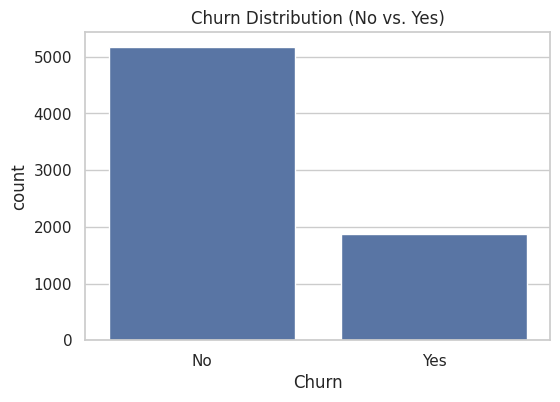


Overall Churn Rate: 26.54%


In [ ]:
# Churn Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution (No vs. Yes)')
plt.show()

# Calculate churn rate
churn_rate = (df['Churn'] == 'Yes').mean()
print(f"\nOverall Churn Rate: {churn_rate:.2%}")

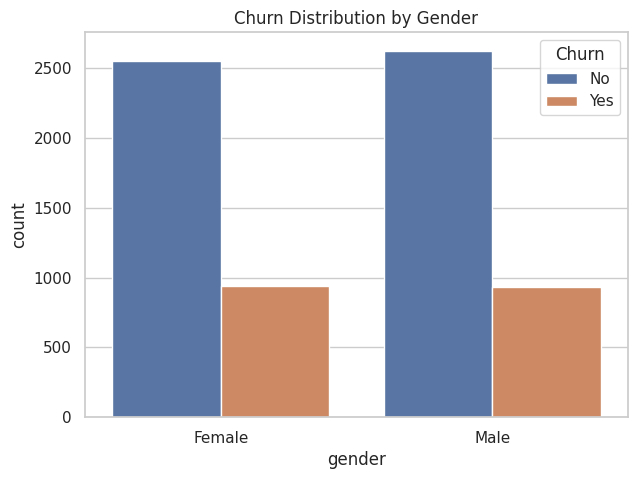

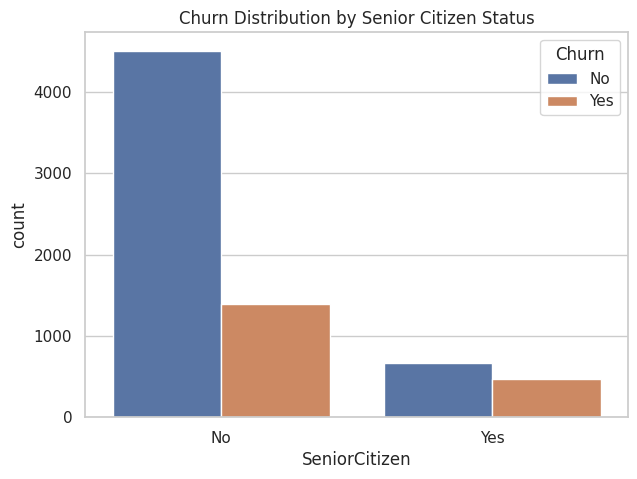

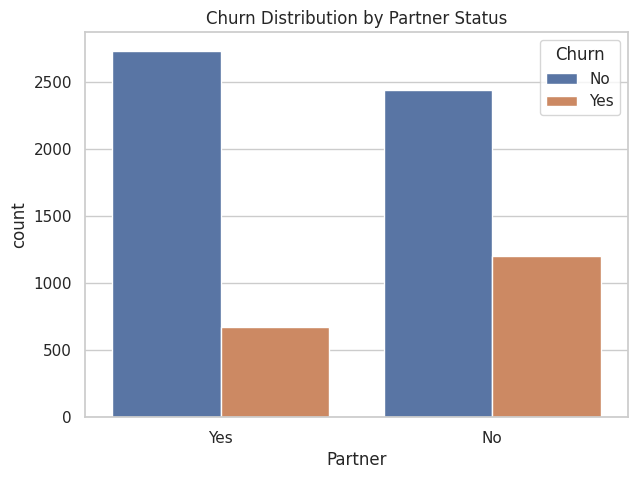

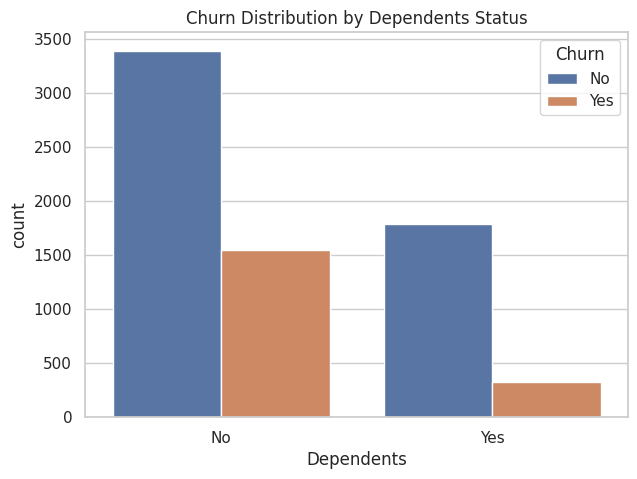

In [ ]:
# Demographics vs. Churn (Gender)
plt.figure(figsize=(7, 5))
sns.countplot(x='gender', hue='Churn', data=df)
plt.title('Churn Distribution by Gender')
plt.show()

# For SeniorCitizen (Note: 0 = No, 1 = Yes)
plt.figure(figsize=(7, 5))
sns.countplot(x='SeniorCitizen', hue='Churn', data=df)
plt.title('Churn Distribution by Senior Citizen Status')
plt.xticks([0, 1], ['No', 'Yes']) # Make labels readable
plt.show()

# For Partner
plt.figure(figsize=(7, 5))
sns.countplot(x='Partner', hue='Churn', data=df)
plt.title('Churn Distribution by Partner Status')
plt.show()

# For Dependents
plt.figure(figsize=(7, 5))
sns.countplot(x='Dependents', hue='Churn', data=df)
plt.title('Churn Distribution by Dependents Status')
plt.show()

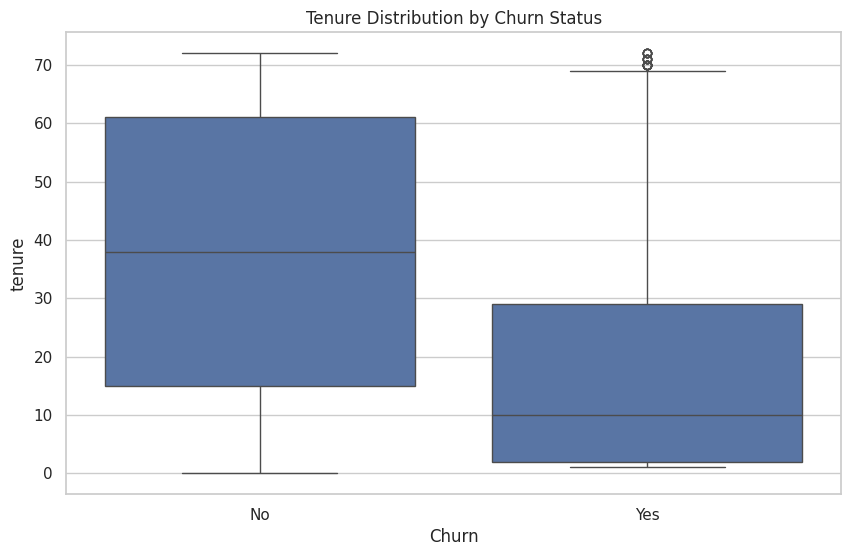

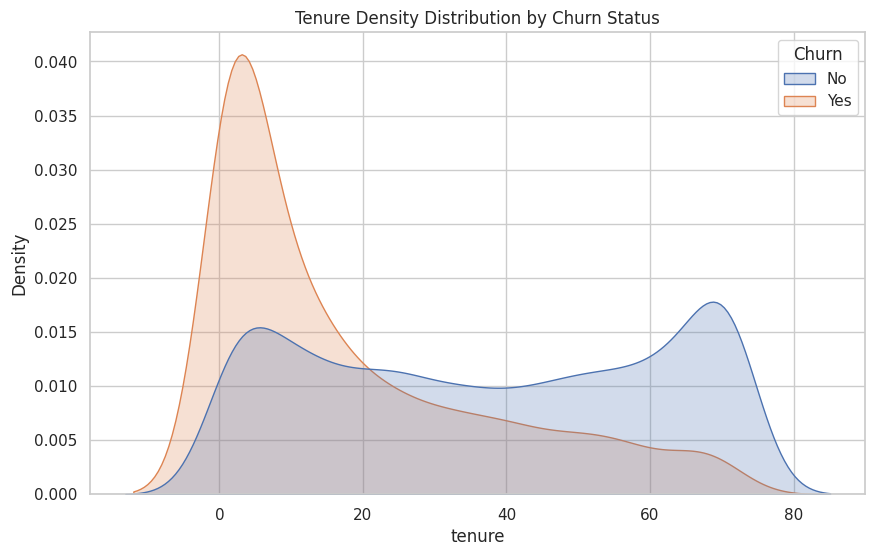

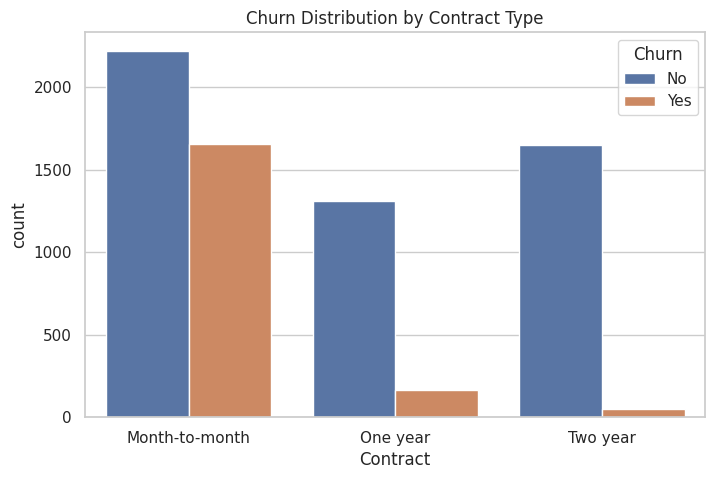

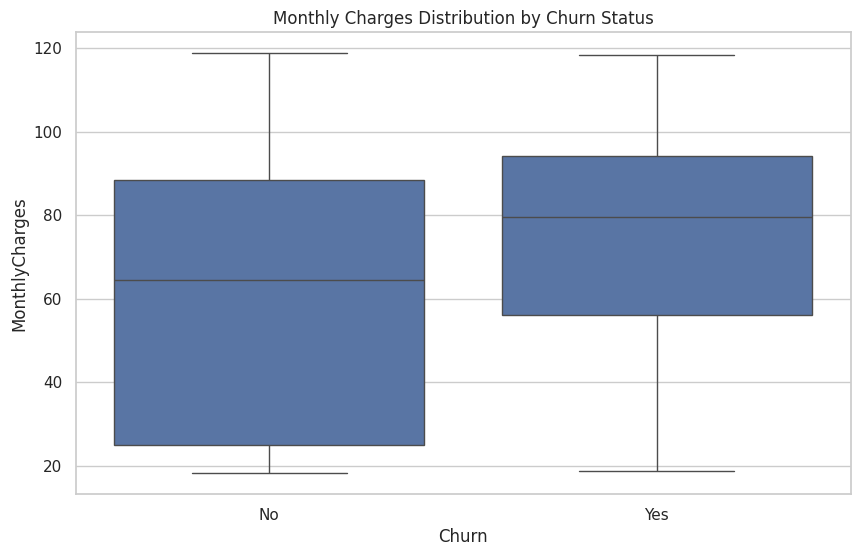

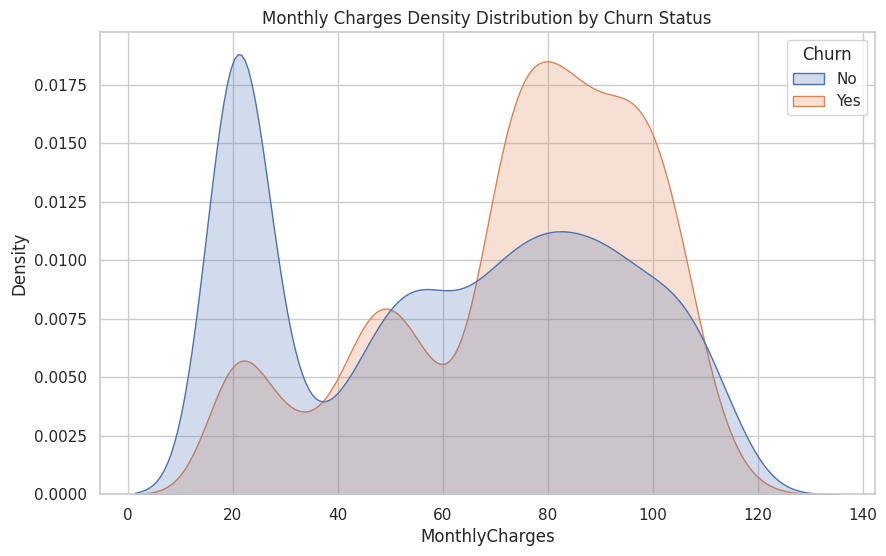

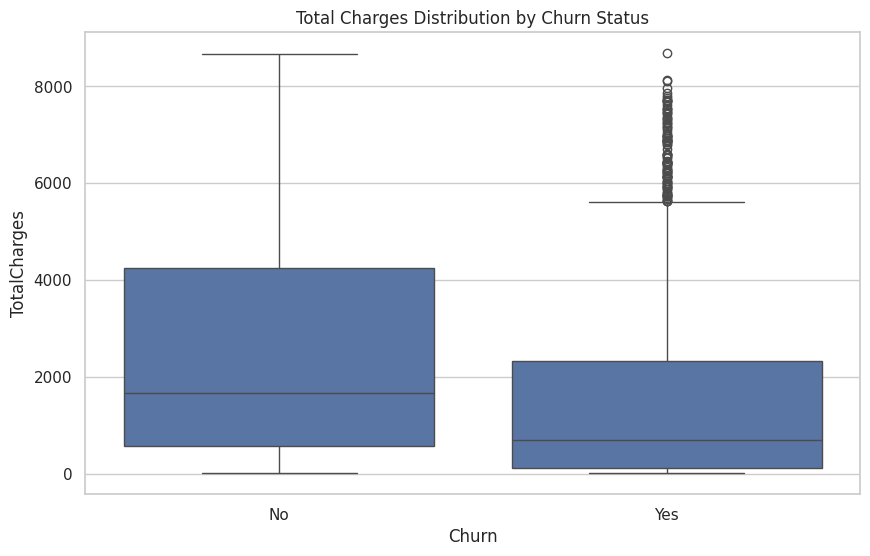

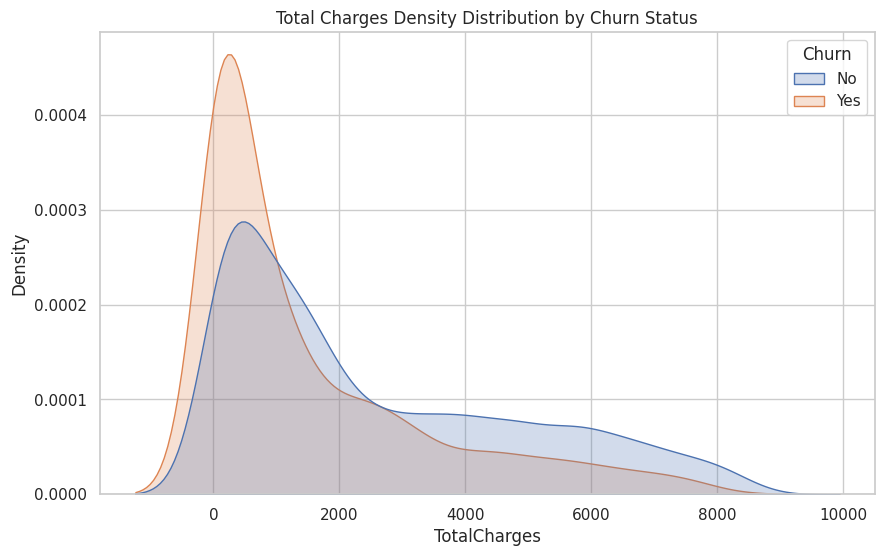

In [ ]:
# Phase 2: Exploring Account Information and Services

# 1. Tenure vs. Churn (Using Box Plots or KDE plots)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tenure Distribution by Churn Status')
plt.show()

# Kernel Density Estimate plots show the distribution shape
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='tenure', hue='Churn', fill=True, common_norm=False)
plt.title('Tenure Density Distribution by Churn Status')
plt.show()


# 2. Contract Type vs. Churn
plt.figure(figsize=(8, 5))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn Distribution by Contract Type')
plt.show()


# 3. Monthly Charges vs. Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges Distribution by Churn Status')
plt.show()

# Kernel Density Estimate plots show the distribution shape
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='MonthlyCharges', hue='Churn', fill=True, common_norm=False)
plt.title('Monthly Charges Density Distribution by Churn Status')
plt.show()


# 4. Total Charges vs. Churn (We filled missing values earlier)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='TotalCharges', data=df)
plt.title('Total Charges Distribution by Churn Status')
plt.show()

# Kernel Density Estimate plots show the distribution shape
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='TotalCharges', hue='Churn', fill=True, common_norm=False)
plt.title('Total Charges Density Distribution by Churn Status')
plt.show()

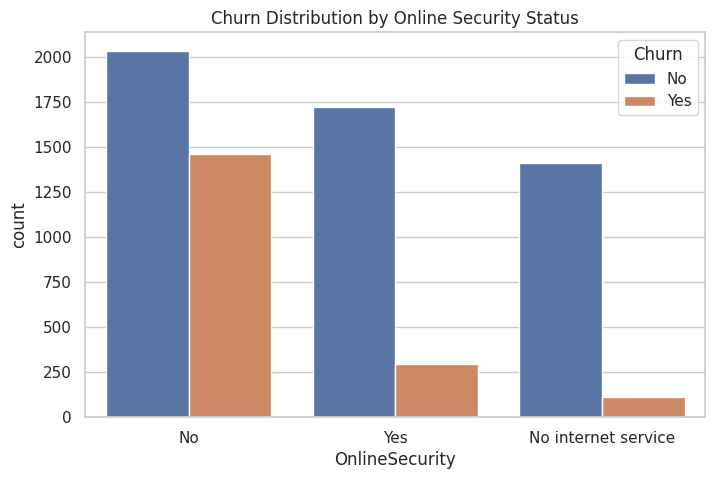

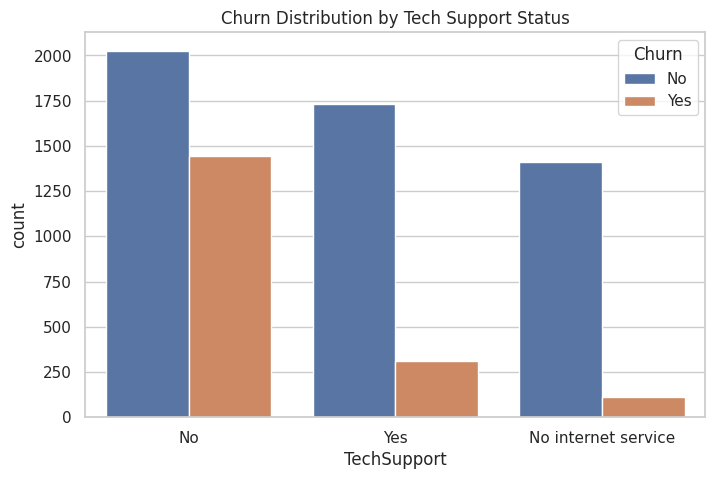

In [ ]:
# Key Services vs. Churn
# OnlineSecurity
plt.figure(figsize=(8, 5))
sns.countplot(x='OnlineSecurity', hue='Churn', data=df)
plt.title('Churn Distribution by Online Security Status')
# Note: Values might include 'No internet service'
plt.show()

# TechSupport
plt.figure(figsize=(8, 5))
sns.countplot(x='TechSupport', hue='Churn', data=df)
plt.title('Churn Distribution by Tech Support Status')
plt.show()

# --------
# End of EDA

In [ ]:
# Identify categorical columns (excluding the target 'Churn' for now)
categorical_cols = df.select_dtypes(include='object').columns.tolist()
print("Categorical columns to encode:", categorical_cols)

# Identify numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Numerical columns:", numerical_cols)

Categorical columns to encode: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
Numerical columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [ ]:
# Feature Engineering & Preprocessing

# Encode Binary Categorical Variables (including Target)

# Convert 'Churn' Yes/No to 1/0
label_encoder = LabelEncoder()
df['Churn'] = label_encoder.fit_transform(df['Churn']) # Yes=1, No=0

# Identify other binary columns (excluding already encoded Churn)
binary_cols = [col for col in df.columns if df[col].nunique() == 2 and df[col].dtype == 'object']
print("\nBinary columns to encode (Yes/No):", binary_cols)

# Apply Label Encoding to these binary columns
for col in binary_cols:
    df[col] = label_encoder.fit_transform(df[col]) # Yes=1, No=0


Binary columns to encode (Yes/No): ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']


In [ ]:
# One-Hot Encode Multi-Category Columns

# Identify remaining categorical columns for One-Hot Encoding
multi_cat_cols = df.select_dtypes(include='object').columns.tolist()
print("\nMulti-category columns for One-Hot Encoding:", multi_cat_cols)

# Apply One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=multi_cat_cols, drop_first=True)
# drop_first=True helps avoid multicollinearity by dropping one category from each feature

print("\nShape of DataFrame after One-Hot Encoding:", df_encoded.shape)
print("Columns after One-Hot Encoding:", df_encoded.columns.tolist())

# Display first few rows of the fully encoded dataframe
print("\nFirst 5 rows of encoded data:")
print(df_encoded.head())

# Separate features (X) and target (y)
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']


Multi-category columns for One-Hot Encoding: ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

Shape of DataFrame after One-Hot Encoding: (7043, 31)
Columns after One-Hot Encoding: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_

In [ ]:
# Scaling Numerical Features
# Identify numerical columns AFTER encoding (tenure, MonthlyCharges, TotalCharges)
numerical_features = X.select_dtypes(include=np.number).columns
# Filter specifically for the original numerical columns we want to scale
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']
print("\nNumerical columns to scale:", cols_to_scale)

scaler = StandardScaler()
X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])

print("\nFirst 5 rows after scaling numerical features:")
print(X[cols_to_scale].head())


Numerical columns to scale: ['tenure', 'MonthlyCharges', 'TotalCharges']

First 5 rows after scaling numerical features:
     tenure  MonthlyCharges  TotalCharges
0 -1.277445       -1.160323     -0.994242
1  0.066327       -0.259629     -0.173244
2 -1.236724       -0.362660     -0.959674
3  0.514251       -0.746535     -0.194766
4 -1.236724        0.197365     -0.940470


In [ ]:
# Splitting Data into Training and Testing Sets
# Use train_test_split to separate data
# stratify=y ensures that the proportion of churners is the same in both train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\nShape of training features (X_train):", X_train.shape)
print("Shape of testing features (X_test):", X_test.shape)
print("Shape of training target (y_train):", y_train.shape)
print("Shape of testing target (y_test):", y_test.shape)
print("\nChurn distribution in y_train:")
print(y_train.value_counts(normalize=True))
print("\nChurn distribution in y_test:")
print(y_test.value_counts(normalize=True))


Shape of training features (X_train): (5634, 30)
Shape of testing features (X_test): (1409, 30)
Shape of training target (y_train): (5634,)
Shape of testing target (y_test): (1409,)

Churn distribution in y_train:
Churn
0    0.734647
1    0.265353
Name: proportion, dtype: float64

Churn distribution in y_test:
Churn
0    0.734564
1    0.265436
Name: proportion, dtype: float64


Training Logistic Regression model...
Training complete.

--- Logistic Regression Evaluation ---
Accuracy: 0.7388

Confusion Matrix:
[[748 287]
 [ 81 293]]


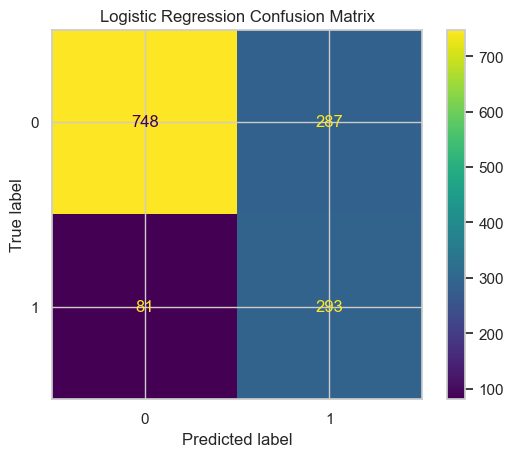

In [ ]:
# Model Building & Evaluation: Logistic Regression ---

# Initialize the Logistic Regression model
# Increased max_iter for convergence, class_weight='balanced' helps with imbalanced data
log_reg = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')

# Train the model
print("Training Logistic Regression model...")
log_reg.fit(X_train, y_train)
print("Training complete.")

# Make predictions on the test set
y_pred_log_reg = log_reg.predict(X_test)

# 4. Evaluate the model
print("\n--- Logistic Regression Evaluation ---")

# Accuracy
accuracy = accuracy_score(y_test, y_pred_log_reg)
print(f"Accuracy: {accuracy:.4f}")

# Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred_log_reg)
print(cm) # Raw matrix

# Display Confusion Matrix nicely
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot()
plt.title('Logistic Regression Confusion Matrix')
plt.show()
# Interpretation Notes:
# Top-left (TN): Correctly predicted 'Stay'
# Bottom-right (TP): Correctly predicted 'Churn'
# Top-right (FP): Incorrectly predicted 'Churn' (Predicted Yes, Actual No)
# Bottom-left (FN): Incorrectly predicted 'Stay' (Predicted No, Actual Yes)

In [ ]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log_reg, target_names=['No Churn (0)', 'Churn (1)']))
# Note: support is the number of actual occurrences of the class in the test set.


Classification Report:
              precision    recall  f1-score   support

No Churn (0)       0.90      0.72      0.80      1035
   Churn (1)       0.51      0.78      0.61       374

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.80      0.74      0.75      1409




Training Random Forest model...
Training complete.

--- Random Forest Evaluation ---
Accuracy: 0.7814

Confusion Matrix:


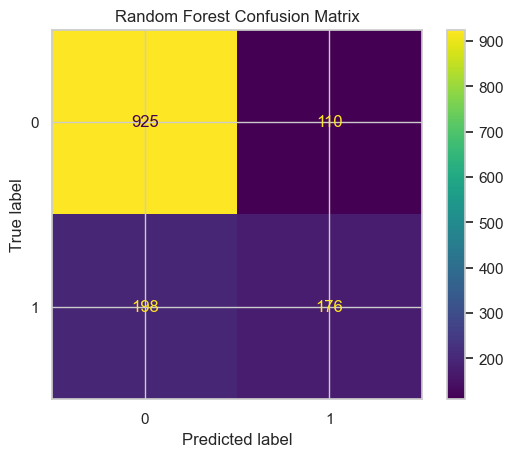

In [ ]:
# Model Building & Evaluation: Random Forest

# Initialize the Random Forest model
# n_estimators=100 means building 100 trees
rf_clf = RandomForestClassifier(n_estimators=100,
                                random_state=42,
                                class_weight='balanced_subsample', # Good for imbalanced data with RF
                                n_jobs=-1) # Use all available CPU cores

# Train the model
print("\nTraining Random Forest model...")
rf_clf.fit(X_train, y_train)
print("Training complete.")

# Make predictions on the test set
y_pred_rf = rf_clf.predict(X_test)

# Evaluate the model
print("\n--- Random Forest Evaluation ---")

# Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy_rf:.4f}")

# Confusion Matrix
print("\nConfusion Matrix:")
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Display Confusion Matrix nicely
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf_clf.classes_)
disp_rf.plot()
plt.title('Random Forest Confusion Matrix')
plt.show()


Classification Report:
              precision    recall  f1-score   support

No Churn (0)       0.82      0.89      0.86      1035
   Churn (1)       0.62      0.47      0.53       374

    accuracy                           0.78      1409
   macro avg       0.72      0.68      0.70      1409
weighted avg       0.77      0.78      0.77      1409


--- Feature Importance ---


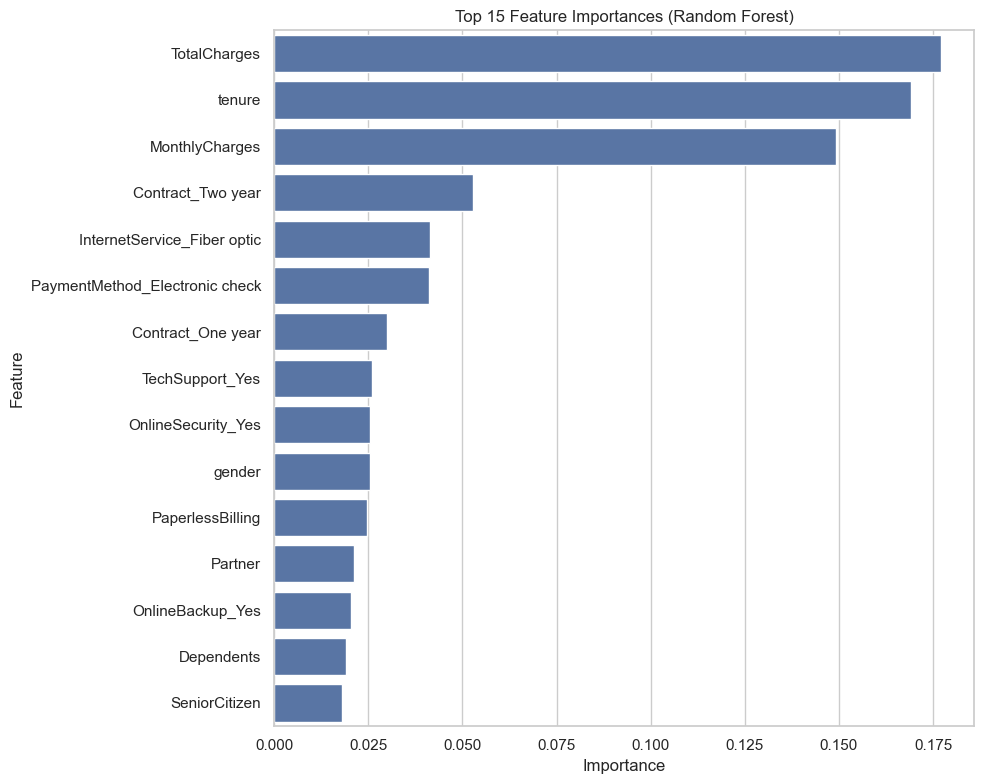


Top 15 Features:
                           Feature  Importance
8                     TotalCharges    0.177022
4                           tenure    0.169242
7                   MonthlyCharges    0.149123
26               Contract_Two year    0.052690
11     InternetService_Fiber optic    0.041279
28  PaymentMethod_Electronic check    0.041039
25               Contract_One year    0.030033
20                 TechSupport_Yes    0.025848
14              OnlineSecurity_Yes    0.025558
0                           gender    0.025427
6                 PaperlessBilling    0.024584
2                          Partner    0.021267
16                OnlineBackup_Yes    0.020450
3                       Dependents    0.019185
1                    SeniorCitizen    0.018027


In [ ]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['No Churn (0)', 'Churn (1)']))


# Feature Importance
print("\n--- Feature Importance ---")
importances = rf_clf.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot top N features
top_n = 15
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(top_n))
plt.title(f'Top {top_n} Feature Importances (Random Forest)')
plt.tight_layout() # Adjust layout to prevent overlapping labels
plt.show()

print(f"\nTop {top_n} Features:")
print(feature_importance_df.head(top_n))


Calculated scale_pos_weight: 2.77

Training XGBoost model...
Training complete.

--- XGBoost Evaluation ---
Accuracy: 0.7644

Confusion Matrix:


C:\Users\NEUTRON\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:49:04] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


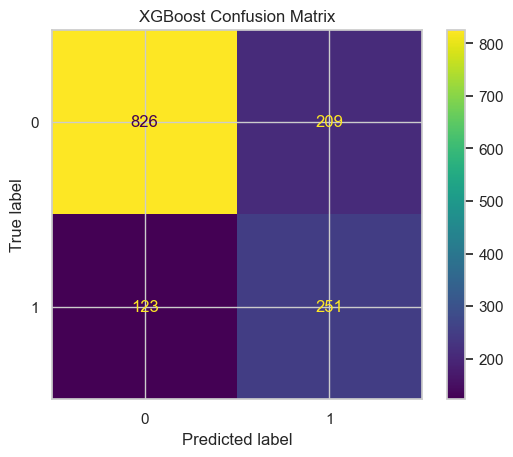


Classification Report:
              precision    recall  f1-score   support

No Churn (0)       0.87      0.80      0.83      1035
   Churn (1)       0.55      0.67      0.60       374

    accuracy                           0.76      1409
   macro avg       0.71      0.73      0.72      1409
weighted avg       0.78      0.76      0.77      1409


--- Feature Importance (XGBoost) ---


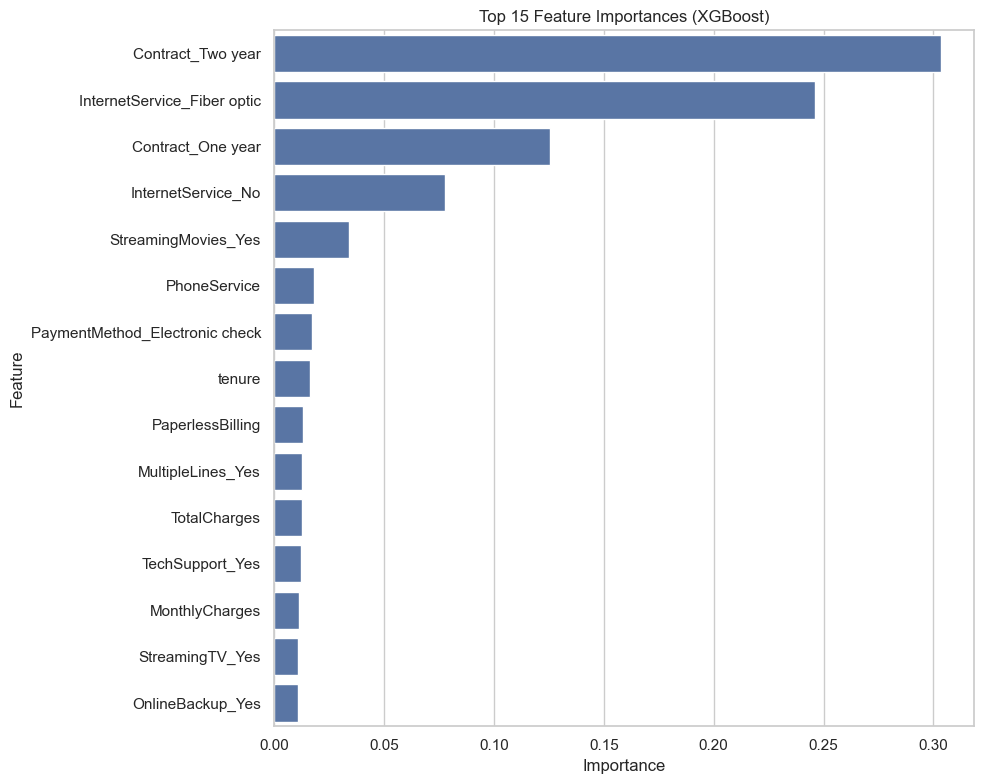


Top 15 Features (XGBoost):
                           Feature  Importance
26               Contract_Two year    0.303279
11     InternetService_Fiber optic    0.246169
25               Contract_One year    0.125573
12              InternetService_No    0.077704
24             StreamingMovies_Yes    0.034030
5                     PhoneService    0.018225
28  PaymentMethod_Electronic check    0.017361
4                           tenure    0.016473
6                 PaperlessBilling    0.012955
10               MultipleLines_Yes    0.012408
8                     TotalCharges    0.012404
20                 TechSupport_Yes    0.012057
7                   MonthlyCharges    0.011078
22                 StreamingTV_Yes    0.010990
16                OnlineBackup_Yes    0.010694


In [ ]:
# Model Building & Evaluation: XGBoost

# Calculate scale_pos_weight for handling imbalance
# (count of negative class / count of positive class)
neg_count = (y_train == 0).sum()
pos_count = (y_train == 1).sum()
scale_pos_weight_value = neg_count / pos_count
print(f"\nCalculated scale_pos_weight: {scale_pos_weight_value:.2f}")


# Initialize the XGBoost Classifier model
xgb_clf = xgb.XGBClassifier(objective='binary:logistic',
                            eval_metric='logloss',
                            use_label_encoder=False, # Recommended
                            scale_pos_weight=scale_pos_weight_value, # Handle imbalance
                            random_state=42)

# Train the model
print("\nTraining XGBoost model...")
xgb_clf.fit(X_train, y_train)
print("Training complete.")

# Make predictions on the test set
y_pred_xgb = xgb_clf.predict(X_test)

# Evaluate the model
print("\n--- XGBoost Evaluation ---")

# Accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy: {accuracy_xgb:.4f}")

# Confusion Matrix
print("\nConfusion Matrix:")
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Display Confusion Matrix nicely
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=xgb_clf.classes_)
disp_xgb.plot()
plt.title('XGBoost Confusion Matrix')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb, target_names=['No Churn (0)', 'Churn (1)']))

# Feature Importance (Bonus - different way to get it for XGBoost)
print("\n--- Feature Importance (XGBoost) ---")
importances_xgb = xgb_clf.feature_importances_
feature_names_xgb = X_train.columns # Should be same as before
feature_importance_df_xgb = pd.DataFrame({'Feature': feature_names_xgb, 'Importance': importances_xgb})

# Sort features by importance
feature_importance_df_xgb = feature_importance_df_xgb.sort_values(by='Importance', ascending=False)

# Plot top N features
top_n = 15
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_xgb.head(top_n))
plt.title(f'Top {top_n} Feature Importances (XGBoost)')
plt.tight_layout()
plt.show()

print(f"\nTop {top_n} Features (XGBoost):")
print(feature_importance_df_xgb.head(top_n))